### Epoxy Curing Stress Test Results

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [220]:
mpl.rcdefaults()
sns.set_palette('tab10')

In [223]:
# Optimal Data (I formatted it with excel)
df = pd.read_csv('optimal_cure_data.csv')
df['sample'] = df['Mix'].astype('string') + "-" + df['Sample'].astype('string') + "_o"
df = df.sort_values(by='sample')

# Sub-optimal Data (raw from lab)
df_list = []
for i in range(1,7):
    df2 = pd.read_csv(f'Specimen_RawData_{i}.csv')
    df2['sample']=i
    df2.rename(columns={'Time':'Time (s)', 'Load':'Load (N)', 'Tensile strain (Extension)': 'Tensile strain (Extension) (mm/mm)', 
                       'Tensile extension':'Tensile extension (mm)', 'Tensile stress':'Tensile stress (MPa)'}, inplace=True)
    df2.drop(index=0, inplace=True)
    df_list.append(df2)
df2 = pd.concat(df_list, ignore_index=True)
df2['sample'] = df2['sample'].map({1:'1-1', 2:'1-2', 3:'1-3', 4:'2-1', 5:'2-2', 6:'2-3'})
df2.to_csv('lab_cure_data.csv')
df2 = pd.read_csv('lab_cure_data.csv') # This fixes something

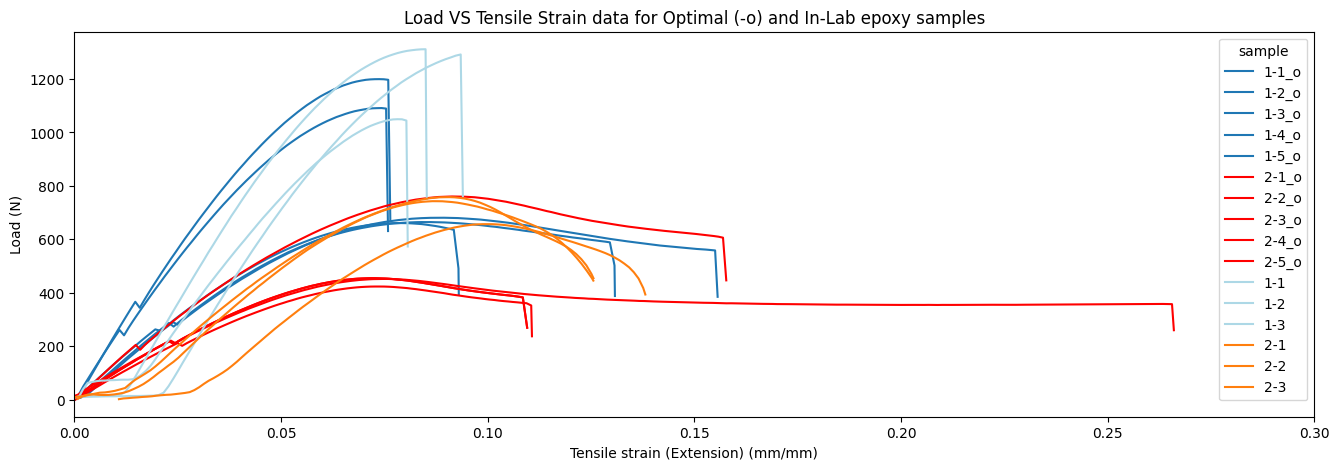

In [229]:
plt.figure(figsize=(16,5))
sns.lineplot(data=df, x='Tensile strain (Extension) (mm/mm)', y='Load (N)', 
             hue='sample', palette=['C0','C0','C0','C0','C0','red','red','red','red','red'])
sns.lineplot(data=df2, x='Tensile strain (Extension) (mm/mm)', y='Load (N)', 
             hue='sample', palette=['lightblue','lightblue','lightblue','C1','C1','C1'])
plt.xlim(0, 0.3)
plt.title('Load VS Tensile Strain data for Optimal (-o) and In-Lab epoxy samples')
plt.show()

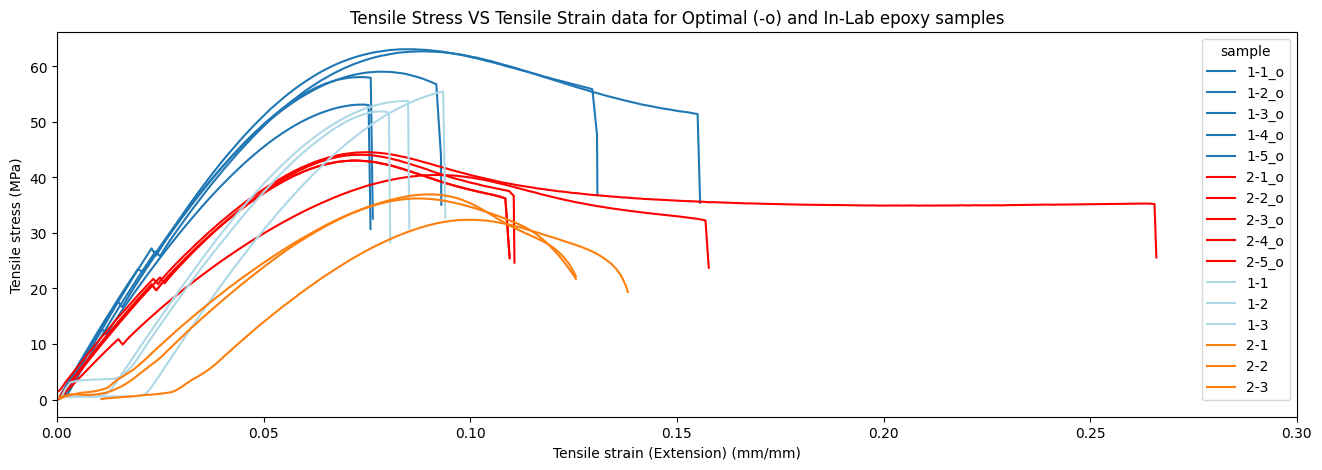

In [233]:
plt.figure(figsize=(16,5))
sns.lineplot(data=df, x='Tensile strain (Extension) (mm/mm)', y='Tensile stress (MPa)', 
             hue='sample', palette=['C0','C0','C0','C0','C0','red','red','red','red','red'])
sns.lineplot(data=df2, x='Tensile strain (Extension) (mm/mm)', y='Tensile stress (MPa)', 
             hue='sample', palette=['lightblue','lightblue','lightblue','C1','C1','C1'])
plt.xlim(0, 0.3)
plt.title('Tensile Stress VS Tensile Strain data for Optimal (-o) and In-Lab epoxy samples')
plt.show()

In [230]:
df

,Time (s),Load (N),Tensile strain (Extension) (mm/mm),Tensile extension (mm),Tensile stress (MPa),Sample,Mix,sample
755,7.0,660.79089,0.07846,1.17694,59.05719,1,1,1-1_o
745,6.0,643.16913,0.06735,1.01031,57.48227,1,1,1-1_o
744,5.9,639.70575,0.06624,0.99362,57.17274,1,1,1-1_o
743,5.8,636.16998,0.06514,0.97706,56.85673,1,1,1-1_o
742,5.7,631.70349,0.06402,0.96037,56.45755,1,1,1-1_o
...,...,...,...,...,...,...,...,...
70,7.0,448.72620,0.07848,1.17719,42.51556,5,2,2-5_o
71,7.1,447.17249,0.07959,1.19387,42.36835,5,2,2-5_o
72,7.2,445.18240,0.08072,1.21081,42.17979,5,2,2-5_o
62,6.2,453.24335,0.06960,1.04406,42.94354,5,2,2-5_o
